# GG274 Homework 8: Hypothesis Testing

## Introduction

Residential instability is one component of the [Ontario Marginalization Index](https://www.publichealthontario.ca/-/media/Documents/O/2017/on-marg-technical.pdf?la=en≻lang=en&hash=EED54DF437EDEDA2DFE1A00A4B14A50A) that includes indicators of types and density of residential accommodations, and certain family structure characteristics, such as living alone and dwelling owndership. ([see OCHPP](https://www.ontariohealthprofiles.ca/canmargCAN.php))

In this homework you will explore the following question:

> **Are mental health visits different in Toronto neighbourhoods with higher "residential instability"?**

In [3]:
import numpy as np
import pandas as pd

## Step 1 - Read the Neighbourhood Instability data into a `pandas` `DataFrame`

a)  The data is stored in `1_marg_neighb_toronto_2006_OnMarg.xls` - a Microsoft Excel file format with file extension `.xls`.

Use the `pandas` function `read_excel` to read the sheet `Neighbourhood_Toronto_OnMarg` into a `pandas` `DataFrame` named `marg_neighbourhoods`. 


In [4]:
marg_neighbourhoods = pd.read_excel("1_marg_neighb_toronto_2006_OnMarg.xls",
                                    sheet_name="Neighbourhood_Toronto_OnMarg", 
                                    header=1)

marg_neighbourhoods.head()

,Neighb id,Neighbourhood name,POPULATION,INSTABILITY,INSTABILITY_Q,DEPRIVATION,DEPRIVATION_Q,ETHNICCONCENTRATION,ETHNICCONCENTRATION_Q,DEPENDENCY,DEPENDENCY_Q,ONMARG_COMBINED_Q
0,1,West Humber-Clairville,32252,-0.6639,1,0.1620,3,2.4548,5,-0.2021,3,2.4
1,2,Mount Olive-Silverstone-Jamestown,32127,-0.1081,1,1.0195,5,3.7433,5,-0.5975,1,2.4
2,3,Thistletown-Beaumond Heights,9928,-0.3131,1,0.3460,4,1.6220,4,0.2845,5,2.8
3,4,Rexdale-Kipling,10725,0.1866,2,0.4704,4,1.2396,3,0.2734,5,2.8
4,5,Elms-Old Rexdale,9879,-0.0150,2,0.8040,5,1.9911,4,-0.3527,2,2.6


Use `marg_neighbourhoods` to create a another `DataFrame` called `instability_df` that has three columns: `"Neighb id ", "Neighbourhood name ", "INSTABILITY"`. 

In [5]:
instability_df = marg_neighbourhoods[marg_neighbourhoods.columns[[0, 1, 3]]]

list(instability_df)


['Neighb id ', 'Neighbourhood name ', 'INSTABILITY']

b) Rename the column names of `instability_df` using the following table.  The DataFrame with the new column names should be called `instability_df` (i.e., don't change the name of the DataFrame).


Original column name | New column name
----|----
"Neighb id " | n_id
"INSTABILITY" | instability
"Neighbourhood name " | name

_Be aware of the trailing spaces!_

In [6]:
colnames = {"Neighb id ": "n_id",
            "INSTABILITY" : "instability",
            "Neighbourhood name ": "name"}

instability_df = instability_df.copy()

instability_df.rename(columns=colnames, inplace=True)

instability_df.head()

,n_id,name,instability
0,1,West Humber-Clairville,-0.6639
1,2,Mount Olive-Silverstone-Jamestown,-0.1081
2,3,Thistletown-Beaumond Heights,-0.3131
3,4,Rexdale-Kipling,0.1866
4,5,Elms-Old Rexdale,-0.0150


## Step 2 - Read the mental health visit data into a `pandas` `DataFrame`.

a) In this step you will read in data on rates of mental health visits stored in `2_ahd_neighb_db_ast_hbp_mhv_copd_2012.xls` into a `pandas` `DataFrame` named `mental_health_neighbourhoods`.


In [7]:
mental_health_neighbourhoods = pd.read_excel("2_ahd_neighb_db_ast_hbp_mhv_copd_2012.xls",
                                             sheet_name="2_MentalHealthV_2012", 
                                             header=11)
mental_health_neighbourhoods.head()

,Unnamed: 0,Unnamed: 1,Male,Female,Both sexes,Male.1,Female.1,Both sexes.1,Male.2,Female.2,...,Female.12,Both sexes.12,"Rate Ratio**, Both sexes.4","H/ L/ NS, Both sexes.4","(95% CI) LL, Male.4","(95% CI) UL, Male.4","(95% CI) LL, Female.4","(95% CI) UL, Female.4","(95% CI) LL, Both sexes.4","(95% CI) UL, Both sexes.4"
0,1,West Humber-Clairville,938,1168,2106,13915,14046,27961,6.6,8.2,...,7.2,7.2,0.85,L,6.1,8.3,6.2,8.3,6.4,8.0
1,2,Mount Olive-Silverstone-Jamestown,866,1130,1996,12256,13082,25338,7.0,8.6,...,8.5,8.2,0.96,NS,6.6,9.4,7.2,10.0,7.3,9.3
2,3,Thistletown-Beaumond Heights,275,410,685,4124,4453,8577,6.4,9.2,...,8.1,7.9,0.93,NS,5.9,9.9,6.4,10.0,6.7,9.3
3,4,Rexdale-Kipling,328,453,781,4130,4470,8600,7.7,10.0,...,9.0,9.1,1.07,NS,7.2,11.6,7.3,11.0,7.8,10.6
4,5,Elms-Old Rexdale,287,396,683,3787,4028,7815,7.4,9.6,...,8.1,7.5,0.88,NS,4.8,9.2,6.2,10.5,6.1,9.1


b) Create a new DataFrame `mh_visit_rates` by selecting the columns in `mental_health_neighbourhoods` that corresponds to Neighbourhood ID, Neighbourhood Name, and 'Age-Standardized rate of Mental Health Visits (2012), All Ages 20+' rename this column in `mh_visit_rates` to `mh_visit_rates_mf`.  When you rename this column don't change the name of the DataFrame `mh_visit_rates`.

In [8]:
mh_visit_rates = mental_health_neighbourhoods[mental_health_neighbourhoods.columns[[0, 1, 10]]]

colnames = {"Unnamed: 0": "n_id",
            "Both sexes.2" : "mh_visit_rates_mf",
            "Unnamed: 1" : "name"}

mh_visit_rates = mh_visit_rates.copy()

mh_visit_rates.rename(columns=colnames, inplace=True)

mh_visit_rates.head()

,n_id,name,mh_visit_rates_mf
0,1,West Humber-Clairville,7.4
1,2,Mount Olive-Silverstone-Jamestown,7.8
2,3,Thistletown-Beaumond Heights,7.8
3,4,Rexdale-Kipling,8.9
4,5,Elms-Old Rexdale,8.5


## Step 3 - Merge mental health visits and instability

In this step you will merge the `mh_visit_rates` with `mental_health_neighbourhoods`.

a) Merge `mh_visit_rates` with `instability_df` by matching the values of `"n_id"` and `"name"`, and name this DataFrame `mh_visit_instability`.

In [9]:
mh_visit_instability = mh_visit_rates.merge(instability_df, on=["n_id", "name"])
mh_visit_instability.head()

,n_id,name,mh_visit_rates_mf,instability
0,1,West Humber-Clairville,7.4,-0.6639
1,2,Mount Olive-Silverstone-Jamestown,7.8,-0.1081
2,3,Thistletown-Beaumond Heights,7.8,-0.3131
3,4,Rexdale-Kipling,8.9,0.1866
4,5,Elms-Old Rexdale,8.5,-0.0150


## Step 4

a) Create a new column in `mh_visit_instability` named `instability_binary` that categorizes neighbourhoods. The new columns should have two possible values:

- `"High"`, if the neighbourhood's instability value is greater than or equal to the mean of `"instability"`
- `"Low"`, if the neighbourhood's instability value is less than the mean of `"instability"`

In [10]:
mean_instab = mh_visit_instability["instability"].mean()

mh_visit_instability.loc[
    mh_visit_instability["instability"] >= mean_instab, 
    "instability_binary"] = "High"

mh_visit_instability.loc[
    mh_visit_instability["instability"] < mean_instab, 
    "instability_binary"] = "Low"

b) Compute the frequency distribution of `instability_binary`. Save the results in `instability_binary_frequencies`.  

In [11]:
instability_binary_frequencies = mh_visit_instability["instability_binary"].value_counts()

instability_binary_frequencies

instability_binary
Low     70
High    66
Name: count, dtype: int64

c) Is there evidence that Toronto has many neighbourhoods that have residential instability?  Briefly explain. __(1 mark)__

> There is more than one possible way to answer the question. e.g., 
>
> i. The data shows that about half of the neighbourhoods in Toronto, 66 out of 136, having residential instability measures that are higher than the city-wide mean. It is difficult to provide a definite answer to the question based on the result since it only provide comparison within the city.
>
> ii. (a bit more naive answer) About half of the neighbourhoods in Toronto have high residential instability. 
>
> Any answer with a sensible reasoning based on the data is acceptable.

## Step 5 - Do neighbourhoods with high residential instability have more mental health visits compared to neighbourhoods with low residential isntability?

a) Use the `DataFrame` `describe` method to compute the distribution of `mh_visit_rates_mf` in `mh_visit_instability` **grouped by** `instability_binary`.  Store the results in `median_table`.

In [12]:
median_table = mh_visit_instability.groupby("instability_binary")["mh_visit_rates_mf"].describe()

median_table

,count,mean,std,min,25%,50%,75%,max
instability_binary,,,,,,,,
High,66.0,8.362121,0.937388,5.9,7.825,8.45,9.075,10.5
Low,70.0,7.867143,1.000539,5.7,7.025,7.80,8.775,9.9


Use `median_table` to compute the difference in medians between neighbourhoods with high and low instability.  Store this value in `median_diff`. 

In [13]:
median_diff = median_table["50%"][0] - median_table["50%"][1]

median_diff

C:\Users\yukiz\AppData\Local\Temp\ipykernel_26372\2073326976.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median_diff = median_table["50%"][0] - median_table["50%"][1]


0.6499999999999995

## Step 6 - Set up a simulation in python to test if the medians are equal

a) In this step you will write a function `random_shuffle_median` that returns a simulated value of the median difference (a simulated value of the test statistic) of mental health visit rates in neighbourhoods with high versus low residential instability assuming that there really is no difference in mental health visit rates between these types of neighbourhoods.

A step-by-step explantion of a similar function was given in lecture, and you can follow this example to help guide you through this step.

The function `random_shuffle_median` is started for you below. Your task is to complete the function by filling in the `...`.

Try writing a meaningful docstring for `random_shuffle_median`.  The `pandas` [docstring guide](https://pandas.pydata.org/docs/development/contributing_docstring.html) has some great examples and guidelines.  (NB: this will not be graded)

In [14]:
# def random_shuffle_median():
#     """
#     Put your docstring here (optional)
#     """

#     # shuffle the column of mh_visit_instability that corresponds to high/low instability

#     instability_binary_shuffle = mh_visit_instability[...].sample(
#         frac=1, replace=False).reset_index(drop=True)
    
#     # calculate the median visit rate for high and low instability neighbourhoods

#     visitrate_low_shuffle = mh_visit_instability.loc[instability_binary_shuffle == ..., ...].median()
    
#     visitrate_high_shuffle  = mh_visit_instability.loc[instability_binary_shuffle ==  ..., ...].median()
    
#     shuffled_diff = ... - ...
    
#     return shuffled_diff


In [15]:
def random_shuffle_median():
    """
    Randomly shuffles the column of mh_visit_instability that corresponds to 

    high/low instability and calculates the difference in median visit rates 
    
    for high and low instability neighbourhoods
    """

    instability_binary_shuffle = mh_visit_instability["instability_binary"].sample(
        frac=1, replace=False).reset_index(drop = True)
    visitrate_low_shuffle = mh_visit_instability.loc[
        instability_binary_shuffle == "Low", "mh_visit_rates_mf"].median()
    visitrate_high_shuffle  = mh_visit_instability.loc[
        instability_binary_shuffle == "High", "mh_visit_rates_mf"].median()
    shuffled_diff = visitrate_high_shuffle - visitrate_low_shuffle 
    return shuffled_diff

random_shuffle_median()


0.0

In [16]:
print(random_shuffle_median.__doc__)


    Randomly shuffles the column of mh_visit_instability that corresponds to 

    high/low instability and calculates the difference in median visit rates 
    
    for high and low instability neighbourhoods
    


b) Explain the purpose of 

```python
mh_visit_instability[...].sample(
    frac=1, replace=False).reset_index(drop=True)
```

in 1-2 sentences.

> The line randomly samples 100% (`frac=1`) of the selected column (`'instability_binary'`) without replacements (`replace=False`) and removes the old ordering (`reset_index(drop=True)`). It mimicks random asingment of the high vs low labels to each neighbourhood.

## Step 7 - Compute the distribution of simulated values of the median difference assuming the null hypothesis is true



We will use your student number to generate data for this homework. Complete the assignment statement below by typing your student number as an `int`. In other words assign your student number as an integer to the variable `student_number`.


In [17]:
# # Replace the ... with your student number
student_number = 12345

# # This checks that you correctly typed in your student_number as an int.
# # Make sure there's no error when you run this cell!
# assert type(student_number) == int

a) Write a function called `shuffled_diffs` that returns a list.  The function should use a `for` loop that iterates the function `random_shuffle_median` an arbitrary number of times.  The number of times that the `for` loop iterates should be controlled by a function parameter named `number_of_shuffles`. 

In [18]:
def shuffled_diffs(number_of_shuffles):
    shuffled_diffs = []
    for _ in range(number_of_shuffles):
        shuffled_diffs.append(random_shuffle_median())
    return shuffled_diffs

b) Use `shuffled_diffs` to compute 10 000 simulated median differences between high and low instability neighbourhoods assuming that there is no difference in median mental health visit rates between high and low instability neighbourhoods.  Store the values in `shuffled_diffs_10000`.

In [19]:
np.random.seed(student_number)

shuffled_diffs_10000 = shuffled_diffs(10000)

c) Plot the distribution of the 10,000 simulated values stored in `shuffled_diffs_10000` using a `matplotlib` histogram. Name the plot `null_hypothesis_distribution_plot`.  Label the horizontal axis as `"Difference in median visit rates for high and low instability neighbourhoods"` and the vertical axis as `"Frequency"`.

Text(0, 0.5, 'Frequency')

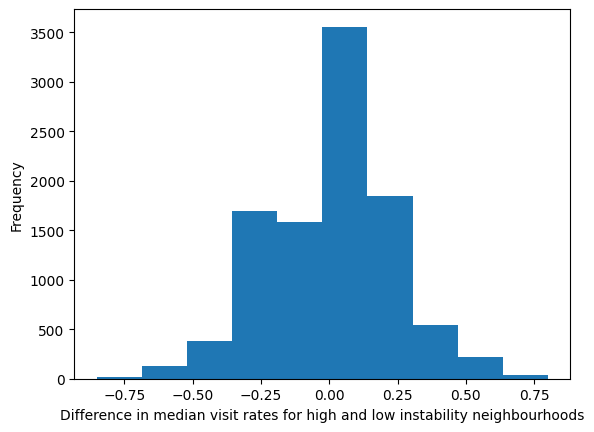

In [20]:
import matplotlib.pyplot as plt

null_hypothesis_distribution_plot = plt.hist(shuffled_diffs_10000)

plt.xlabel("Difference in median visit rates for high and low instability neighbourhoods")

plt.ylabel("Frequency")

## Step 8 - Compute the p-value

a) Compute the number of simulated differences in medians in `shuffled_diffs_10000` that are greater than or equal to the observed median difference (`median_diff`).  Store this value in `right_extreme`.

In [21]:
right_extreme = shuffled_diffs_10000 >= median_diff

right_extreme = right_extreme.sum()

b) Compute the number of simulated differences in medians in `shuffled_diffs_10000` that are less than the observed median difference (`median_diff`).  Store this value in `left_extreme`.

In [22]:
left_extreme = shuffled_diffs_10000 < -median_diff

left_extreme = left_extreme.sum()

c) Use `right_extreme` and `left_extreme` to compute the p-value.  Store the p-value in `pvalue`. 

In [23]:
pvalue = (left_extreme + right_extreme) / 10000

pvalue

0.0064

## Step 9 - Communicate what you did in the steps above


a) In a few sentences introduce the question that you explored in this homework (see the [beginning](#gg274-homework-8-hypothesis-testing) of this homework).  For example, why do you or others think this is an important question?  (__1 mark__)

> We investigated whether neighbourhoods whose residential statuses are relatively instable visit mental health services more or less frequently compared to those with relatively stable residential statuses. The analysis may tell us whether the marginalized neighbourhoods need more support for their mental health.

b)  Briefly describe the data sources that you used to answer the question.  Which statistical variables did you use and why did you use these varaibles? (__1 mark__)

> We used the residential instabilty measure from the Ontario Marginalization Index and the age-standardized rates for mental health visits among those above age 20. We computed the mean of the instability measure to dicotomize the neighbourhoods to those whose measures are above the mean and those whose measures are below the mean. This allowed us to label the neighbourhoods into two groups - high vs. low residential instability. 
>
> We then computed the difference in the median mental health visit rates between the two groups. The medians provided the "typical" (or centre of the distributions) visit rates of the two groups.

c) What computational and statistical methods or analyses did you use to answer the question?  Briefly describe these methods and how they were used to answer the question.  (__1 mark__)

> We simulated the distribution of the difference in median mental health visits rates under the assumption that there is no difference in the median rates betwee the two groups using the bootstrap. We then located the observed difference in the simulated distribution to assess high likely it would be to observe the value when there is actually no difference. When the location of the value in the distribution indicates that it is unlikely, we can reasonably conclude that the median mental health visit rates are different between the two groups.
>
> Note: Full marks if the data and method used are reasonably well explained between part b) and c).

d) Briefly describe the results of your statistical analysis in a few sentences. (__1 mark__)

> After locating the observed difference in the simulated distribution, the resulting p-value is 0.0064 which is very small. It is reasonable to reject the hypothtesis that there is no difference between the two groups and conclude that the mental health visit rates are different between high and low residential instability neighbourhoods. Specifically, the visit rates are higher for those in neighbourhood with higher residential instability.

e) What conclusions can you draw about the question you set out to answer that is supported by the data and statistical analysis of the data?  State at least one limitation of your conclusions. (See the [USC Research Guide section on study limitations](https://libguides.usc.edu/writingguide/limitations)) (__1 mark__)

> The data shows that the typical mental health visit rates in Toronto neighbourhoods with relatively unstable residential statuses is higher. Our statistical analysis provides a reasonably strong evidence that there is a systematic difference and we didn't observe the difference by chance. 
>
> Limitations may include...
>
> - the mental health visit rate data are from 2012 whereas the Ontario Marginalization Index is from 2006; a significant change in the neighbourhood composition may have altered the residential stability.
> - the mental health visit rates are based on OHIP only (this requires some diggin on the data source: https://www.ontariohealthprofiles.ca/o_documents/aboutTheDataON/1_AboutTheData_AdultHealthDisease.pdf); other types of mental health visits may be relevant.
> - ...
>
> Any reasonable limitation identified is acceptable.